In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [3]:
df=pd.read_csv("Position Salary.csv")

In [4]:
df.shape

(10, 3)

In [5]:
df.head()

,Position,Level,Salary
0,Busienss Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,120000
4,Country Manager,5,140000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [7]:
x=df.iloc[:,1:2].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [8]:
y=df.iloc[:,2].values
print(y)

[ 45000  50000  60000 120000 140000 130000 100000  90000  95000  85000]


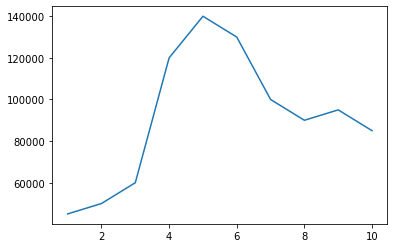

In [9]:
plt.plot(x,y)
plt.show()

In [10]:
# Random Forest Classifier

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [12]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [13]:
y_pred = rf.predict(x_test)

In [14]:
print(y_pred)

[68250. 89850.]


In [15]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [16]:
print('R Squared', metrics.r2_score(y_test,y_pred))

R Squared 0.8455755102040816


In [17]:
print('Mean Squared Error=', metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error= 47292500.0


In [18]:
print('Mean Absolute Error=', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error= 6700.0


In [19]:
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error=', rmse)

Root Mean Squared Error= 6876.954267697292


In [24]:
import six
import sys
sys.modules ['sklearn.externals.six']=six
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [28]:
features=x.column
features

AttributeError: 'numpy.ndarray' object has no attribute 'column'

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=features,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)